In [1]:
import gc
import json
import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm

from utils import loadpkl, removeCorrelatedVariables, removeMissingVariables

%matplotlib inline

In [6]:
files = sorted(glob('../features/*.feather'))
df = pd.concat([pd.read_feather(f) for f in tqdm(files, mininterval=60)], axis=1)

# set card_id as index
df.set_index('card_id', inplace=True)
df.head()

  0%|          | 0/1101 [00:00<?, ?it/s]/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/io/feather_format.py:124: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  nthreads=int_use_threads)
/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels
100%|██████████| 1101/1101 [00:01<00:00, 582.51it/s]


,AOV,AOV_ratio,CLV,CLV_month_diff,CLV_month_diff_ratio,CLV_ratio,Mothers_Day_2018,Outlier_Likelyhood,amount_month_ratio_max,amount_month_ratio_mean,...,year,year_0,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_92a2005557,182.318395,1.661881,4.690294e+06,1.705895e+08,-0.008053,0.013005,49.492977,0.000273,NaN,NaN,...,2017,0,0,0,0,0,0,0,1,0
C_ID_3d0044924f,101.445060,0.159410,1.071890e+07,1.005798e+07,0.000050,0.000047,56.833333,0.001651,NaN,NaN,...,2017,0,0,0,0,0,0,0,1,0
C_ID_d639edf6cd,76.651163,0.679063,8.444000e+04,NaN,NaN,0.000367,15.720930,0.003357,NaN,NaN,...,2016,0,0,0,0,0,0,1,0,0
C_ID_186d6a6901,118.311688,0.856153,3.805900e+05,NaN,NaN,0.007076,55.623377,0.001447,NaN,NaN,...,2017,0,0,0,0,0,0,0,1,0
C_ID_cdbd2c0db2,249.208020,1.067407,2.299008e+06,-9.753155e+07,0.031752,0.078204,61.856099,0.000277,NaN,NaN,...,2017,0,0,0,0,0,0,0,1,0


In [27]:
configs = json.load(open('../configs/207_lgbm_best.json'))
df = df[configs['features']]
df.head()

,target,outliers,CLV_ratio,amount_month_ratio_max,amount_month_ratio_mean,amount_month_ratio_min,card_id_cnt_ratio,card_id_cnt_total,card_id_total,category_1_mean,...,new_weekofyear_max,new_weekofyear_mean,new_weekofyear_min,new_weekofyear_nunique,price_max,price_mean,price_total,purchase_amount_min,purchase_amount_ratio,quarter
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_92a2005557,-0.820283,0.0,0.013005,NaN,NaN,-350.00,0.088462,283.0,283.0,0.000000,...,17.0,13.304348,10.0,7.0,1329.000,11856.00000,5108.00000,20.000000,0.146973,2.0
C_ID_3d0044924f,0.392913,0.0,0.000047,NaN,NaN,7.99,0.017143,356.0,356.0,0.088571,...,13.0,9.000000,5.0,4.0,96.250,39.53125,55.71875,7.988281,0.002733,1.0
C_ID_d639edf6cd,0.688056,0.0,0.000367,NaN,NaN,NaN,0.023256,44.0,44.0,0.000000,...,17.0,17.000000,17.0,1.0,NaN,NaN,NaN,42.156250,0.015793,3.0
C_ID_186d6a6901,0.142495,0.0,0.007076,NaN,NaN,NaN,0.090909,84.0,84.0,0.298701,...,16.0,13.857143,10.0,5.0,287.250,55.12500,57.46875,12.500000,0.077820,3.0
C_ID_cdbd2c0db2,-0.159749,0.0,0.078204,NaN,NaN,-156.09,0.270677,169.0,169.0,0.168338,...,17.0,13.361111,9.0,8.0,130.375,104.00000,94.81250,5.500000,0.288818,4.0


In [28]:
corr = df.corr()
corr.to_csv('../output/corr.csv')
corr

,target,outliers,CLV_ratio,amount_month_ratio_max,amount_month_ratio_mean,amount_month_ratio_min,card_id_cnt_ratio,card_id_cnt_total,card_id_total,category_1_mean,...,new_weekofyear_max,new_weekofyear_mean,new_weekofyear_min,new_weekofyear_nunique,price_max,price_mean,price_total,purchase_amount_min,purchase_amount_ratio,quarter
target,1.000000,-0.896187,-0.007692,-0.007009,0.000740,-0.042711,-0.016927,-0.008605,-0.008605,-0.041448,...,-0.088953,-0.080918,-0.059821,-0.027562,-0.008003,-0.003130,0.006038,-0.026871,-0.044940,0.032560
outliers,-0.896187,1.000000,-0.003340,-0.006562,-0.008662,0.040595,-0.023908,-0.008658,-0.008658,0.046674,...,0.056025,0.065308,0.066874,-0.052398,-0.023982,-0.013966,-0.016472,0.013364,-0.012537,-0.034347
CLV_ratio,-0.007692,-0.003340,1.000000,-0.011086,-0.006771,0.006917,0.460852,-0.035269,-0.035269,0.002977,...,0.023277,0.017122,0.008608,0.047886,-0.007716,-0.014286,-0.012198,-0.006116,0.678429,0.016470
amount_month_ratio_max,-0.007009,-0.006562,-0.011086,1.000000,0.822423,0.481423,-0.013594,0.065312,0.065312,0.178620,...,-0.414922,-0.434567,-0.404620,-0.008345,0.033518,-0.036522,-0.037006,0.297767,-0.023649,0.071368
amount_month_ratio_mean,0.000740,-0.008662,-0.006771,0.822423,1.000000,0.800592,0.008881,-0.119427,-0.119427,0.225000,...,-0.336284,-0.332651,-0.287603,-0.155790,-0.040759,-0.068052,-0.070315,0.605935,0.005386,0.056930
amount_month_ratio_min,-0.042711,0.040595,0.006917,0.481423,0.800592,1.000000,0.008767,-0.269166,-0.269166,0.083912,...,0.045560,0.066911,0.078331,-0.339310,-0.081646,-0.070520,-0.075911,0.346793,0.018612,-0.085557
card_id_cnt_ratio,-0.016927,-0.023908,0.460852,-0.013594,0.008881,0.008767,1.000000,-0.246713,-0.246713,0.010401,...,0.091056,0.051286,0.001202,0.269786,-0.082729,-0.120787,-0.102412,-0.041074,0.556901,0.140747
card_id_cnt_total,-0.008605,-0.008658,-0.035269,0.065312,-0.119427,-0.269166,-0.246713,1.000000,1.000000,-0.116105,...,-0.017722,-0.058928,-0.098386,0.361332,0.312389,0.348024,0.323770,-0.160741,-0.142107,-0.102829
card_id_total,-0.008605,-0.008658,-0.035269,0.065312,-0.119427,-0.269166,-0.246713,1.000000,1.000000,-0.116105,...,-0.017722,-0.058928,-0.098386,0.361332,0.312389,0.348024,0.323770,-0.160741,-0.142107,-0.102829
category_1_mean,-0.041448,0.046674,0.002977,0.178620,0.225000,0.083912,0.010401,-0.116105,-0.116105,1.000000,...,-0.045772,-0.027393,-0.003271,-0.131621,-0.242070,-0.199520,-0.188613,0.195503,0.018028,-0.001046


In [3]:
# split test & train
train_df = df[df['target'].notnull()]
test_df = df[df['target'].isnull()]

In [4]:
# Kolmogorov-Smirnov statistic on 2 samples

from scipy.stats import ks_2samp
list_p_value =[]

for c in tqdm(train_df.columns.tolist()):
    list_p_value.append(ks_2samp(test_df[c] , train_df[c])[1])

Se = pd.Series(list_p_value, index = train_df.columns.tolist()).sort_values() 
list_discarded = list(Se[Se < .1].index)

100%|██████████| 1100/1100 [00:33<00:00, 44.17it/s]


In [5]:
list_discarded

['outliers',
 'index',
 'Outlier_Likelyhood',
 'target',
 'purchase_amount_max',
 'purchase_amount_total',
 'pred_CLV',
 'new_category_2_mean_mean',
 'hist_purchase_amount_sum',
 'category_2_mean',
 'hist_pred_CLV',
 'new_mer_sum_category_sum_mean',
 'new_category_2_mean',
 'AOV',
 'new_AOV',
 'hist_mer_avg_purchases_lag3_min_mean',
 'new_purchase_amount_mean',
 'purchase_amount_mean',
 'hist_purchase_amount_max',
 'new_hour_mean',
 'hist_purchase_amount_approved_sum',
 'new_mer_sum_category_mean_mean',
 'hist_mer_category_2_3_sum_mean',
 'hist_mer_category_2_3_mean_mean',
 'hist_mer_category_2_3_mean_sum',
 'hist_mer_category_2_3_sum_sum',
 'new_hour_min',
 'hist_purchase_amount_unapproved_mean',
 'hist_purchase_amount_unapproved_var',
 'hist_category_2_mean_mean',
 'hist_category_3_mean',
 'category_3_mean',
 'installments_mean',
 'hist_installments_mean']

In [3]:
df

,AOV,AOV_ratio,CLV,CLV_month_diff,CLV_month_diff_ratio,CLV_ratio,Mothers_Day_2018,Outlier_Likelyhood,amount_month_ratio_max,amount_month_ratio_mean,...,weekofyear_9,year_0,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_92a2005557,182.318395,1.661881,4.690294e+06,1.705895e+08,-0.008053,0.013005,49.492977,0.000273,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
C_ID_3d0044924f,101.445060,0.159410,1.071890e+07,1.005798e+07,0.000050,0.000047,56.833333,0.001651,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
C_ID_d639edf6cd,76.651163,0.679063,8.444000e+04,NaN,NaN,0.000367,15.720930,0.003357,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
C_ID_186d6a6901,118.311688,0.856153,3.805900e+05,NaN,NaN,0.007076,55.623377,0.001447,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
C_ID_cdbd2c0db2,249.208020,1.067407,2.299008e+06,-9.753155e+07,0.031752,0.078204,61.856099,0.000277,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
C_ID_0894217f2f,483.522727,1.205120,2.430160e+05,3.456953e+04,0.017783,0.017706,0.000000,0.026964,145.214286,68.974675,...,0,0,0,0,0,0,0,1,0,0
C_ID_7e63323c00,40.024038,0.781892,1.518839e+06,NaN,NaN,0.000289,60.980769,0.001925,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
C_ID_dfa21fc124,118.265152,0.364359,4.223825e+04,2.111912e+04,0.006775,0.006775,87.333333,0.003648,246.500000,59.146212,...,0,0,0,0,0,0,0,0,1,0
C_ID_fe0fdac8ea,187.483333,0.693107,2.522200e+04,NaN,NaN,0.012322,54.500000,0.005695,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [4]:
features_json = {}
features_json['features'] = df.columns.tolist()
with open('../features/all_features.json', 'w') as f:
    json.dump(features_json, f, indent=4)

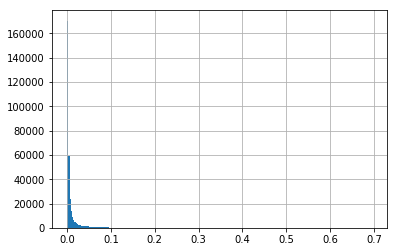

In [8]:
df.Outlier_Likelyhood.hist(bins=255)

In [10]:
df.hist_observation_date.value_counts()

0.002700    226928
0.012688     28169
0.049408     18192
0.043287     11695
0.040525      8206
0.036088      7255
0.031849      6032
0.038936      4992
0.029155      4399
0.018003      3766
0.000978      3276
0.000000      2630
Name: hist_observation_date, dtype: int64